<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Spam3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

# Reading the data



In [ ]:
# Importing the datasets
df  = pd.read_csv('emails.csv')
# y      = df.OSA.values
# x_data = df.drop(['OSA'], axis = 1)

# Display the data

In [ ]:
df.shape

(5172, 3002)

**Drop unwanted data**

In [ ]:
# Drop the first column
df = df.drop('Email No.', axis = 1)

In [ ]:
# Drop rows with any NaN values
df = df.dropna()

In [ ]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Class
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.sample(n = 10)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Class
4707,4,11,1,6,2,0,74,16,1,17,...,0,0,0,0,0,0,0,0,0,0
1284,33,26,7,29,17,9,201,1,1,63,...,0,0,0,1,0,0,0,1,0,0
5080,3,5,1,3,0,2,24,2,2,4,...,0,0,0,0,0,0,0,0,0,1
2116,0,0,1,1,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4144,1,2,1,2,1,1,12,2,0,1,...,0,0,0,0,0,0,0,0,0,0
3684,9,6,89,5,2,2,119,0,48,20,...,0,0,0,0,0,0,0,1,0,0
1971,1,3,1,0,0,0,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2272,8,2,7,1,2,2,72,0,2,6,...,0,0,0,0,0,0,0,0,0,0
2943,1,2,2,0,3,3,16,1,0,3,...,0,0,0,0,0,0,0,0,0,1
4105,3,2,2,0,1,0,27,0,1,7,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ones_count = df['Class'].value_counts()[1]
print(ones_count)

1500


In [ ]:
zeros_count = (df['Class'] == 0).sum()
print(zeros_count)

3672


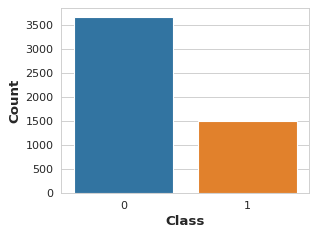

In [ ]:
# Create a figure with size 8x6 inches, 80 dots per inch resolution
fig = plt.figure(figsize=(4,3), dpi=80)
# Calculate the number of classes in the class
sns.countplot(data=df, x='Class')

# Set the font properties
font = {'family': 'sans-serif', 'weight': 'bold', 'size': 12}

# Set the font of the x-label and y-label
plt.xlabel("Class", fontdict=font)
plt.ylabel("Count", fontdict=font)

plt.savefig('classes.png')

**Correlation between different variables**

In [ ]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='Class', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['Class'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

Rank of features based on correlation coefficients:
 Class          1
thanks         2
hpl            3
hanks          4
thank          5
            ... 
pretty      2997
forecast    2998
taxes       2999
field       3000
launch      3001
Name: Class, Length: 3001, dtype: int64


**Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Assuming your DataFrame is called `df` and the target variable is called `Class`
X = df.drop('Class', axis=1)
y = df['Class']

# Instantiate a RandomOverSampler object
oversampler = RandomOverSampler()

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine the resampled X and y into a new DataFrame
df = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
df.shape

(7344, 3001)

In [ ]:
# # example of random undersampling to balance the class distribution
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# # The class can be used just like the RandomOverSampler class in the 
# # previous section, except the strategies impact the majority class 
# # instead of the minority class. For example, setting the sampling_strategy 
# # argument to “majority” will oversample the majority class determined 
# # by the class with the largest number of examples.

# # define Oversample strategy
# oversample = RandomOverSampler(sampling_strategy='not majority')
# x_over, y_over = oversample.fit_resample(x_data,y_data)

In [ ]:
# y_over.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# x_over.shape

In [ ]:
# X

**Preparing data for machine learning**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Class'], axis=1), 
                                                    df['Class'], 
                                                    test_size=0.25, 
                                                    random_state=42)

**Feature selection**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance. 

selector  = SelectKBest(f_classif, k=20)
x_train   = selector.fit_transform(X_train, Y_train)
x_test    = selector.transform(X_test)

y_train = Y_train
y_test  = Y_test

In [ ]:
# Get the feature names
# feature_names = list(df.columns)

# print(feature_names)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

print(selected_feature_names)

Index(['enron', 'deal', 'hpl', 'our', 'forwarded', 'daren', 'xls', 'farmer',
       'attached', 'volume', 'more', 'nom', 'questions', 'thanks', 'subject',
       'hanks', 'question', 'thank', 'hp', 'aren'],
      dtype='object')


In [ ]:
X_train[selected_feature_names].head()

,enron,deal,hpl,our,forwarded,daren,xls,farmer,attached,volume,more,nom,questions,thanks,subject,hanks,question,thank,hp,aren
3698,2,0,1,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,1,0
3396,0,2,0,4,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0
4372,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4290,0,4,0,1,0,0,0,0,1,2,0,0,1,1,0,1,1,1,0,0
29,0,0,0,1,1,0,0,0,0,0,0,4,0,0,3,0,0,0,0,0


**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

def calculate_confusion(clf_name, y_train, y_pred_train, y_test, y_pred_test):
 
    # Calculate accuracy, precision, recall, and F1 score for training and testing sets
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    train_prec = precision_score(y_train, y_pred_train, average='weighted', zero_division=1)
    test_prec = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)

    train_rec = recall_score(y_train, y_pred_train, average='weighted', zero_division=1)
    test_rec = recall_score(y_test, y_pred_test, average='weighted', zero_division=1)

    train_f1 = f1_score(y_train, y_pred_train, average='weighted', zero_division=1)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=1)
    
    # Calculate the confusion matrix for training and testing sets
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)

    # Define the performance metrics for training and testing cases
    train_metrics = ["Train Accuracy", "Train Precision", "Train Recall", "Train F1"]
    test_metrics = ["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]

    # Create a list of lists containing the metrics
    table = [train_metrics + test_metrics,
         [train_acc, train_prec, train_rec, train_f1, test_acc, test_prec, test_rec, test_f1]]

    # Print the table
    print('-----Results for',clf_name,'----------------------')
    print(tabulate(table, headers='firstrow'))

    # Create a 1x2 figure with the confusion matrix on the left and evaluation metrics on the right
    fig, axs = plt.subplots(1, 2, figsize=(8,4),sharey=True)
    
    # Set the font properties
    font = {'family': 'sans-serif', 'weight': 'bold', 'size': 12}

    # Plot the confusion matrix for training set
    sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g', ax=axs[0],annot_kws={"size": 16})
    axs[0].set_title('Training Set Confusion Matrix',fontsize=12,fontdict=font)
    axs[0].set_xlabel('Predicted Labels',fontsize=12,fontdict=font)
    axs[0].set_ylabel('True Labels',fontsize=12,fontdict=font)
    
    # Plot the confusion matrix for testing set
    sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g', ax=axs[1],annot_kws={"size": 16})
    axs[1].set_title('Testing Set Confusion Matrix',fontsize=12,fontdict=font)
    axs[1].set_xlabel('Predicted Labels',fontsize=12,fontdict=font)
    axs[1].set_ylabel('True Labels',fontsize=12,fontdict=font)
    
    # Add a main title to the figure
    fig.suptitle(f'Confusion matrix using {clf_name} ', fontweight='bold', fontsize=14, y=1.003)
    plt.savefig(clf_name + ".png")
    # Show the plot
    plt.show()

# LR

-----Results for LR ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.910675            0.91724        0.910675    0.910259         0.888889          0.903536       0.888889   0.888229


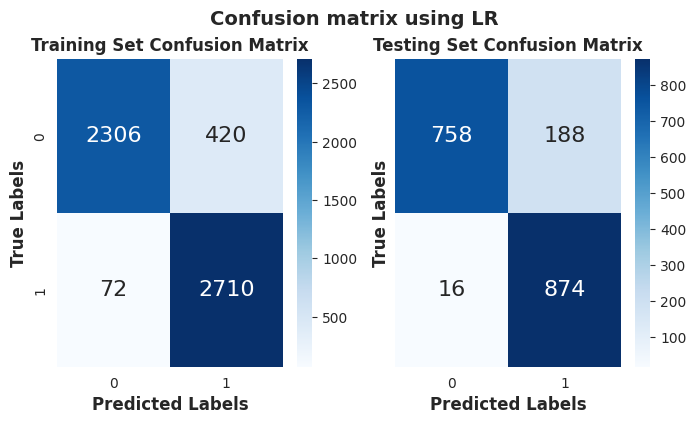

In [ ]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# We now prepare our selected models
models  = []
results = []
names   = []
scoring = 'accuracy'
# names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=20)
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_train, y_train)
results.append(cv_results)  

In [ ]:
# Compute False postive rate, and True positive rate
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, lr.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc1 = metrics.roc_auc_score(y_train,lr.predict(x_train))

# SVM

-----Results for SVM ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
         0.91939           0.924147         0.91939    0.919115         0.903595          0.911317       0.903595   0.903359


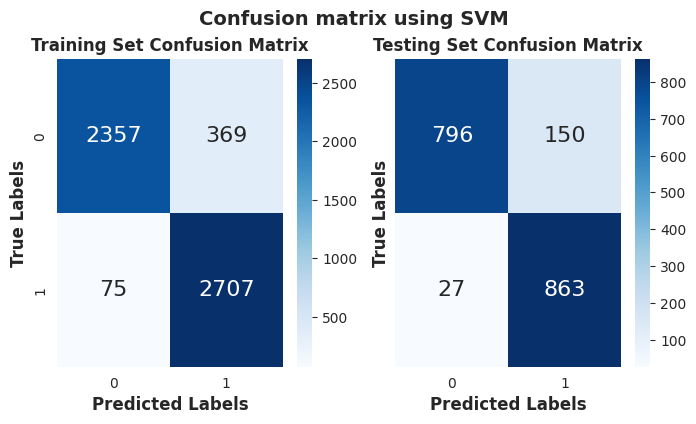

In [ ]:
#SVM ####################################
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_train, y_train)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, svm.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc2 = metrics.roc_auc_score(y_train,svm.predict(x_train))

# GradientBoostingClassifier

-----Results for GBC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.930646            0.93302        0.930646    0.930523         0.915033          0.918933       0.915033   0.914968


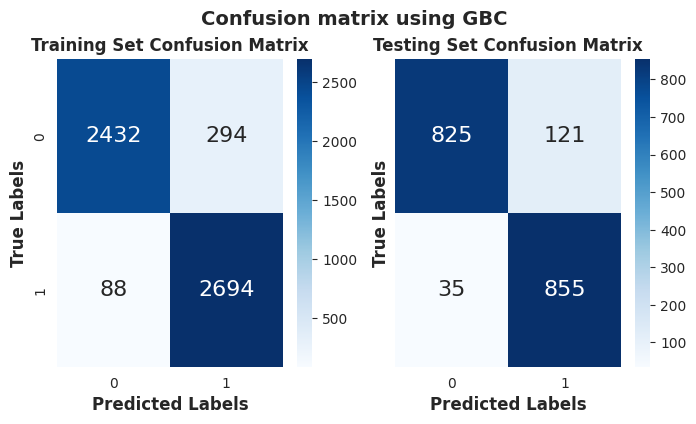

In [ ]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)
calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_train, y_train)
results.append(cv_results)


In [ ]:
# Compute False postive rate, and True positive rate
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, GBC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc3 = metrics.roc_auc_score(y_train,GBC.predict(x_train))

# #GaussianNB

-----Results for GNB ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.882534           0.898185        0.882534    0.881233         0.515251          0.750233       0.515251   0.350415


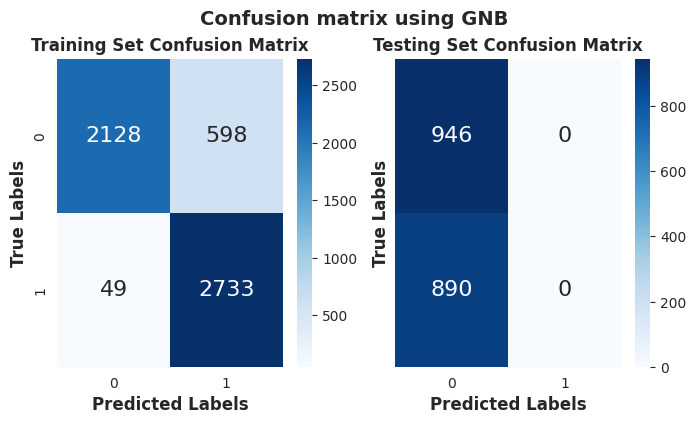

In [ ]:
#GaussianNB
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(priors=None, var_smoothing=1e-9)
GNB.fit(x_train, y_train)

# Adjust classification threshold to 0.3
y_pred_train = GNB.predict(x_train)
# y_pred_train = (y_pred_train >= 0.1).astype(int)

y_pred_test  = GNB.predict(x_test)
# y_pred_test = (y_pred_test >= 0.1).astype(int)

calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_train, y_train)
# results.append(cv_results)


In [ ]:
# Compute False postive rate, and True positive rate
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_train, GNB.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc4 = metrics.roc_auc_score(y_train,GNB.predict(x_train))

# KNN 

-----Results for KNC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.925381           0.928233        0.925381    0.925223         0.913399          0.917743       0.913399   0.913317


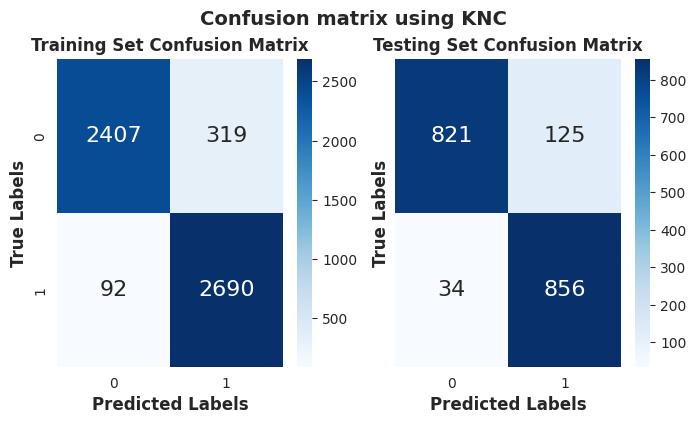

In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_train, y_train)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, KNC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc5 = metrics.roc_auc_score(y_train,KNC.predict(x_train))

# Decision Tree

-----Results for DT ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.875817           0.878177        0.875817    0.875564         0.863834           0.86901       0.863834   0.863633


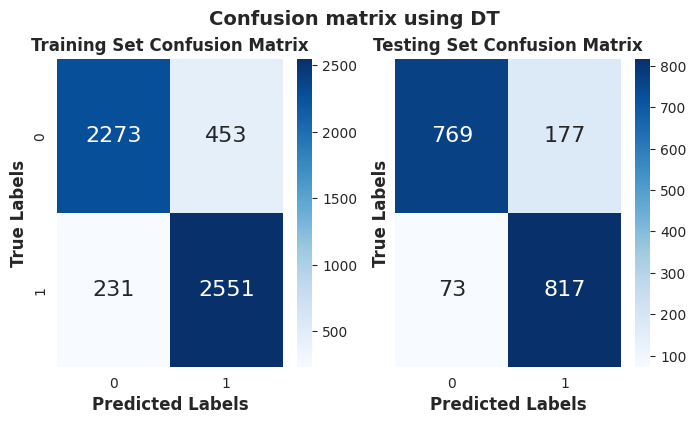

In [ ]:
# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,ccp_alpha=0.01)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_train, y_train)
results.append(cv_results)


In [ ]:
# Compute False postive rate, and True positive rate
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, DT.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc6 = metrics.roc_auc_score(y_train,DT.predict(x_train))

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Export the tree as a Graphviz dot file
dot_data = export_graphviz(DT, out_file=None, feature_names=selected_feature_names,
                           class_names='Class', filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('decision tree', view=False)

# Display the graph
graph

# Save the graph as a PNG file
graph.format = 'png'
graph.render('Decision_Tree')

# # Plot the decision tree
# fig, ax = plt.subplots(figsize=(8,8))
# plot_tree(DT, ax=ax)
# plt.savefig('Decision_Tree.png')
# plt.show()

'Decision_Tree.png'

# RandomForestClassifier

-----Results for RFC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.945715           0.947213        0.945715    0.945653          0.92756          0.931626        0.92756   0.927502


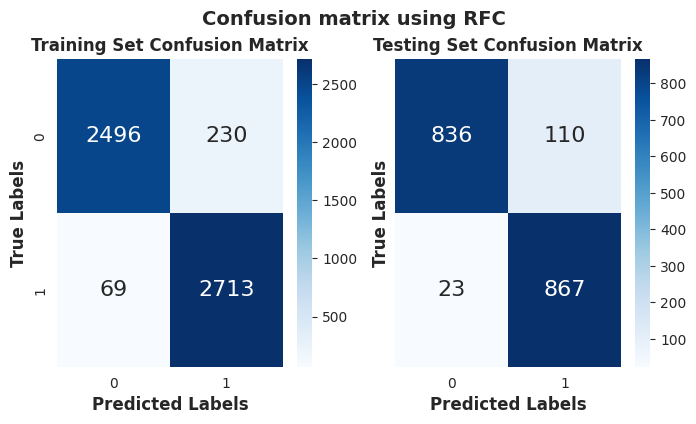

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# RFC = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=np.sqrt(X_train.shape[1]), random_state=42)
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_train, y_train)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_train, RFC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc7 = metrics.roc_auc_score(y_train,RFC.predict(x_train))

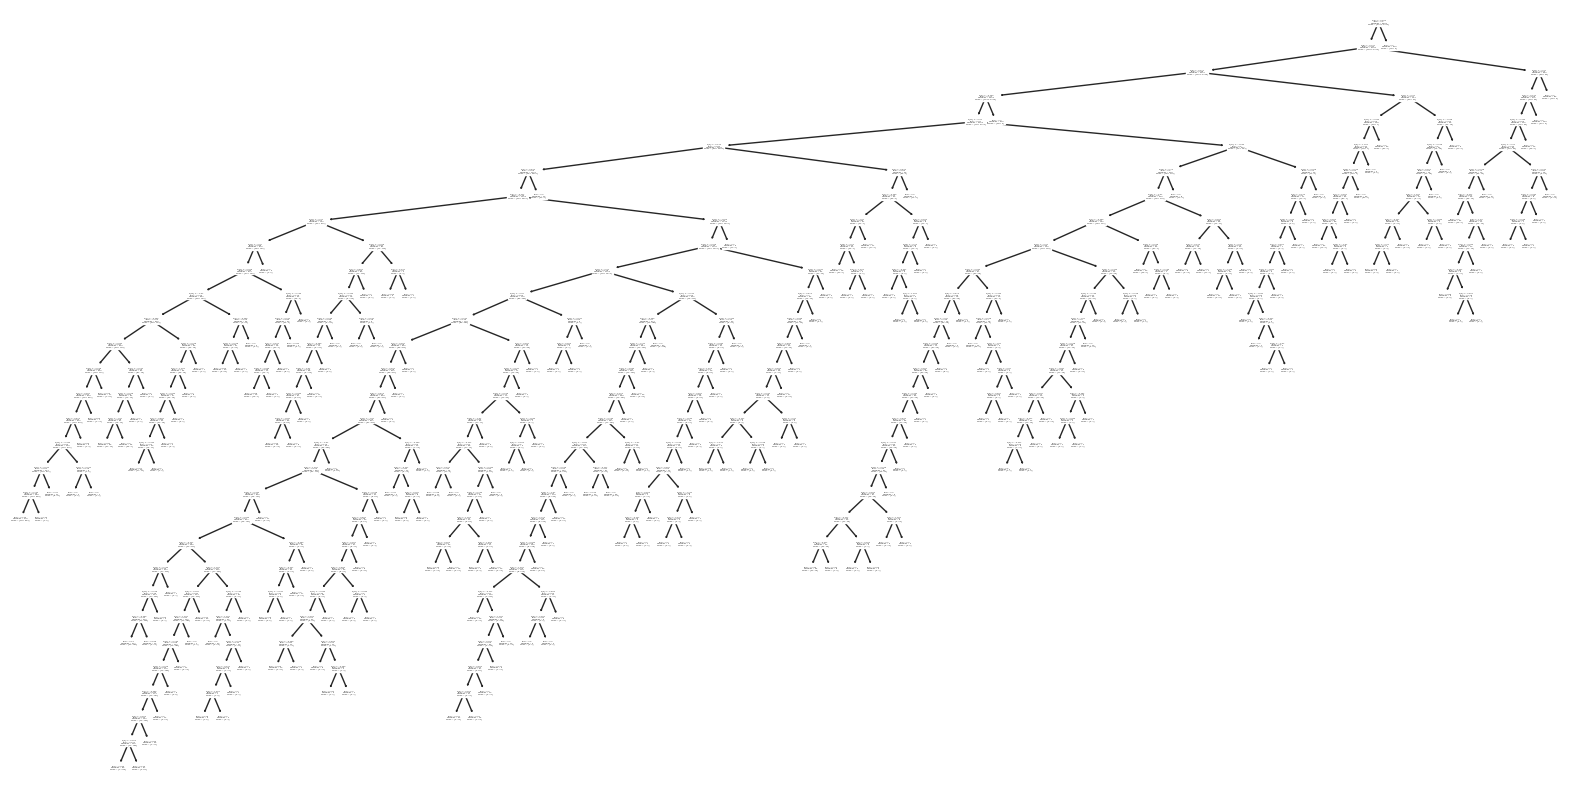

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choose the best tree from the forest based on mean decrease impurity
best_tree_index = RFC.feature_importances_.argmax()

# Plot the best tree in the forest
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(RFC.estimators_[best_tree_index], ax=ax)
plt.show()

# Artificial Neural Network

-----Results for ANN ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.934096           0.935979        0.934096    0.934001         0.910131          0.919531       0.910131   0.909846


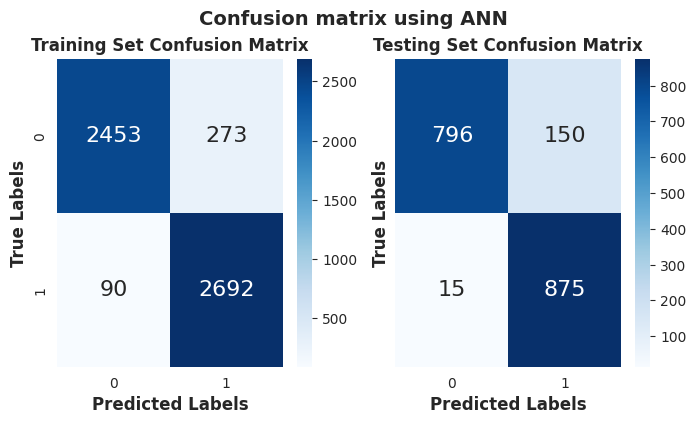

In [ ]:
#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', max_iter= 1500, alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_train, y_train)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, ANN.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc8 = metrics.roc_auc_score(y_train,ANN.predict(x_train))

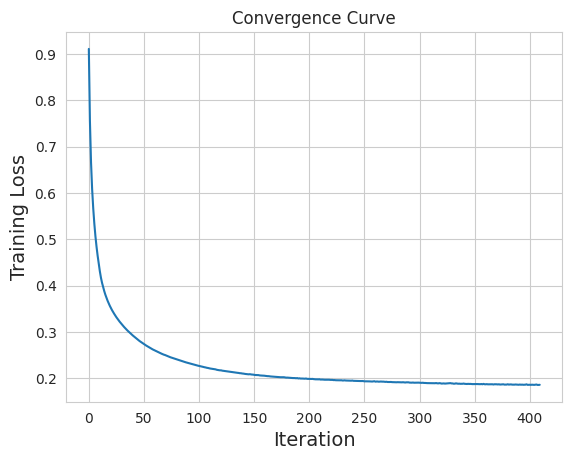

In [ ]:
# Get the training loss values at each iteration
loss_values = ANN.loss_curve_

# Plot the convergence curve
plt.plot(loss_values)
plt.grid(True)
plt.title('Convergence Curve')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Training Loss', fontsize=14)
plt.savefig('ANN_convergence.png')
plt.show()

# BoxPlot

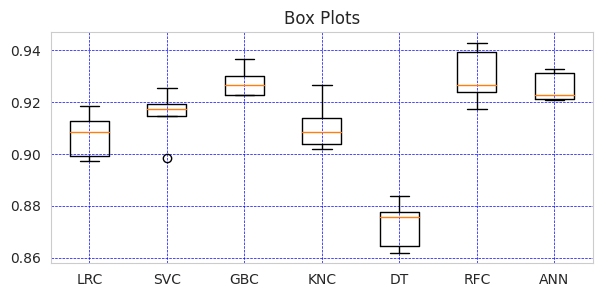

In [ ]:
names = ['LRC', 'SVC', 'GBC', 'KNC', 'DT','RFC', 'ANN']
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(7,3))
# Draw the box plots
ax.boxplot(results)
# Set the labels for each box plot
ax.set_xticklabels(names)
# Add a title to the plot
ax.set_title('Box Plots')
plt.grid(color='b', linestyle='--', linewidth=0.5)
# Show the plot
plt.show()

In [ ]:
# from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt

# def plot_roc_curve(y_true, y_score, label=None):
#     fpr, tpr, thresholds = roc_curve(y_true, y_score)
#     plt.plot(fpr, tpr, label=label)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend()
#     plt.show()


# ROC Curves

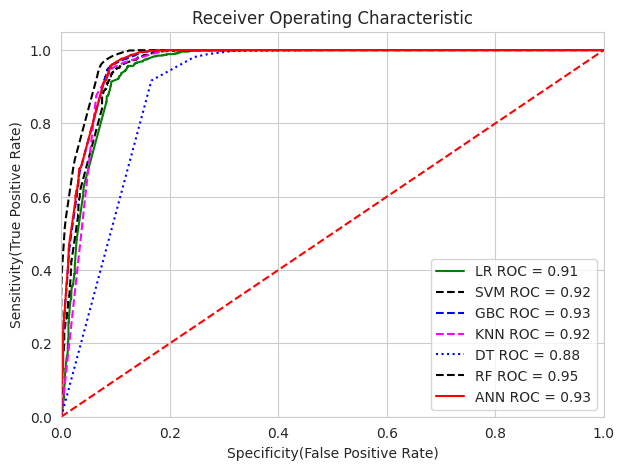

In [ ]:
# Now, plot the computed values
fig = plt.figure(figsize=(7,5))

plt.plot(fpr1, tpr1, linestyle='-',color='green', label='LR ROC = %.2f' %auc1)
plt.plot(fpr2, tpr2, linestyle='--',color='black', label='SVM ROC = %.2f' %auc2)
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='GBC ROC = %.2f' %auc3)
# plt.plot(fpr4, tpr4, linestyle='--',color='green', label='GNB ROC = %.2f' %auc4)
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='KNN ROC = %.2f' %auc5)
plt.plot(fpr6, tpr6, linestyle=':',color='blue', label='DT ROC = %.2f' %auc6)
plt.plot(fpr7, tpr7, linestyle='--',color='black', label='RF ROC = %.2f' %auc7)
plt.plot(fpr8, tpr8,linestyle='-',color='red', label='ANN ROC = %.2f' %auc8)

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display